In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def create_data(b_time=10, a_time=10, scale=1.0):
    out_data = []
    for i in range(b_time):
        out_data.append([1.0*scale+np.random.rand()*0.01, 0.0+np.random.rand()*0.01])
#         out_data.append([1.0*scale+np.random.rand()*0.01, 0.0+np.random.rand()*0.01])
#         out_data.append([-0.5*scale+np.random.rand()*0.01, 0.0+np.random.rand()*0.01])
    out_data.append([0.0*scale, 1.0*scale])
    for i in range(a_time):
        out_data.append([(1.0)*scale+np.random.rand()*0.01, 0.0+np.random.rand()*0.01])
    return out_data

In [19]:
initial_vw = [0., 0.] # initial velocity

dt = 1 # ITI

x = np.array([[initial_vw[0]], [initial_vw[1]], [0.], [0.]])
u = np.array([[0.], [0.], [0.], [0.]]) # 外部要素

# P = np.array([[1., 0.5, 0.5, 0.5], [0.5, 1., 0.5, 0.5], [0.5, 0.5, 1., 0.5], [0.5, 0.5, 0.5, 1.]]) # 共分散行列
# P = P*0.01
P = np.eye(4)*100
F = np.array([[1., 0., dt, 0.], [0., 1., 0., dt], [0., 0., 1., 0.], [0., 0., 0., 1.]])  # 状態遷移行列
H = np.array([[1., 0., 0, 0], [0., 1., 0., 0.]])  # 観測行列
R = np.array([[0.1, 0.0], [0.0, 0.1]]) #ノイズ
I = np.identity((len(x)))    # 4次元単位行列

In [20]:
measurements = np.array(create_data(b_time=100, a_time=100, scale=1.0))

In [21]:
v_arr = []
w_arr = []
vv_arr = []
ww_arr = []
Ks_x = []
Ks_theta = []
pred_err = []
for n in range(len(measurements)):       
    # Prediction
    x = np.dot(F, x) + u
    P = np.dot(np.dot(F, P), F.T)
    v_arr.append(x[0][0])
    w_arr.append(x[1][0])
    vv_arr.append(x[2][0])
    ww_arr.append(x[3][0])
    
    # Update
    Z = np.array([measurements[n]])
    y = Z.T - np.dot(H, x)
    S = np.dot(np.dot(H, P), H.T) + R
    K = np.dot(np.dot(P, H.T), np.linalg.inv(S))
    x = x + np.dot(K, y)        
    P = np.dot((I*1.08 - np.dot(K, H)), P)
    Ks_x.append(K.T[0, :].tolist())
    Ks_theta.append(K.T[1, :].tolist())
    pred_err.append(np.abs(y).tolist())
x = x.tolist()
P = P.tolist()
Ks_x = np.array(Ks_x)
Ks_theta = np.array(Ks_theta)
pred_err = np.array(pred_err)

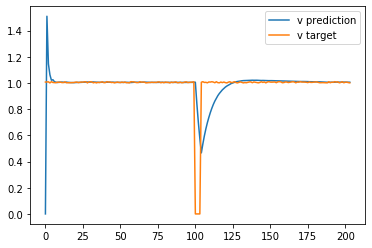

In [22]:
plt.plot(range(len(v_arr)), v_arr, label="v prediction")
plt.plot(range(len(v_arr)), measurements[:, 0], label="v target")
plt.legend()

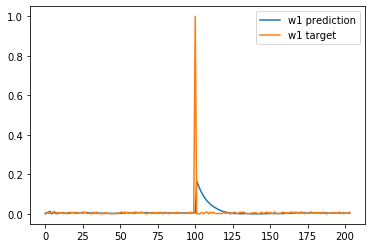

In [23]:
plt.plot(range(len(w_arr)), w_arr, label="w1 prediction")
plt.plot(range(len(w_arr)), measurements[:, 1], label="w1 target")
plt.legend()
# plt.ylim([-1.0, 1.0])

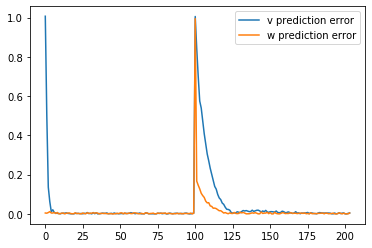

In [24]:
plt.plot(range(len(pred_err[:,0])), pred_err[:,0], label="v prediction error")
plt.plot(range(len(pred_err[:,1])), pred_err[:,1], label="w prediction error")
plt.legend()

Text(0, 0.5, 'velocity')

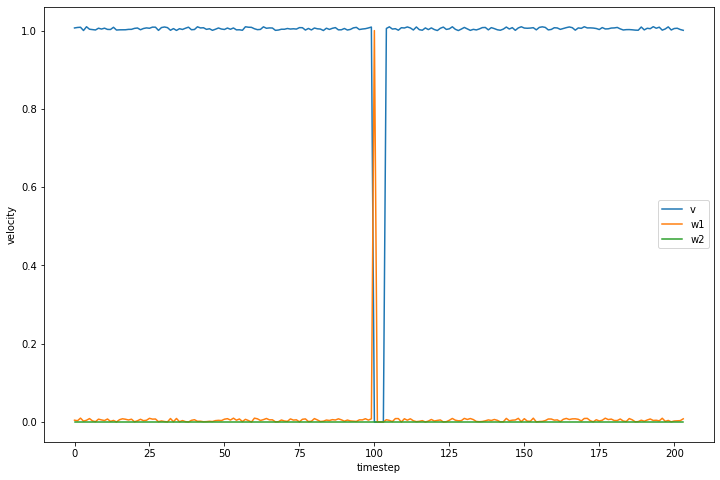

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(range(len(v_arr)), measurements[:, 0], label="v")
plt.plot(range(len(w_arr)), measurements[:, 1], label="w1")
plt.plot(range(len(w_arr)), np.zeros(len(w_arr)), label="w2")
plt.legend()
plt.xlabel("timestep")
plt.ylabel("velocity")